In [12]:
from simulations import *
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Optimization

In [13]:
points = []
def callback_func(x):
    points.append(H(x)[0])
    return x
def target_func(x):
    return H(x)[0]
#x0 = np.random.uniform(0, 2 * pi, 6)
# x0 = [5.04116483e-03, 1.09884935e+00, 8.26706055e-01, 3.41551829e+00,4.01166258e+00, 5.30849340e+00]
# x0 = [-8.96511828, 4.62359229, 4.44776618, 3.25604477, 1.46245918, 1.77980848]
  
def gradient_slsqp(x0):
    r = 3 / 2
    der = np.zeros_like(x0)
    x = np.copy(x0)
    for i in range(len(x0)):
        x[i] = x0[i] + pi / (4 * r)
        der[i] = r * target_func(x)
        x[i] = x0[i] - pi / (4 * r)
        der[i] -= r * target_func(x)
        x[i] = x0[i]
    return der

def gradient_hadamard(x0):
    der = np.zeros_like(x0)
    for i in range(0, len(x0)):
        j = i + 1
        der[i] = hadamard_test(x0, j)
    return der

# Bad gradients


###  random angles

SLSQP_min =  -1.5004554114723816
BFGS_min =  -1.5051681069413108


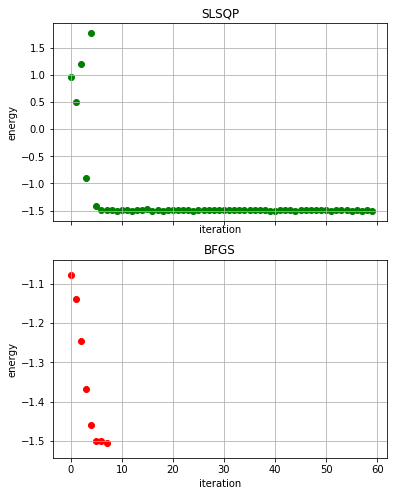

In [118]:
x0 = np.random.uniform(0, 2 * pi, 6)
points = [] #slsqp
result = minimize(target_func, x0=x0, callback=callback_func, method="SLSQP", jac=gradient_slsqp,options={'disp': False, 'maxiter': 60, 'eps': 0, 'ftol': 0})
iteration_number = [i for i in range(0, len(points))]
fig, (ax1,ax2) = plt.subplots(nrows = 2, sharex = True, figsize =(6,8))
ax1.scatter(iteration_number, points, color='g');
ax1.grid(True); ax1.set_title('SLSQP');ax1.set_ylabel('energy'); ax1.set_xlabel('iteration');
print("SLSQP_min = " ,target_func(result.x))
#bfgs
points = []
result = minimize(target_func, x0=x0, callback=callback_func, method="BFGS", jac=gradient_slsqp,options={'disp': False, 'maxiter': 10000, 'eps': 0, 'gtol': 0})
iteration_number = [i for i in range(0, len(points))]
ax2.scatter(iteration_number, points, color='r');
ax2.grid(True); ax2.set_title('BFGS');ax2.set_ylabel('energy'); ax2.set_xlabel('iteration');
print("BFGS_min = " ,target_func(result.x))


### angles from minimizing by spsa and nelder-mead method

SLSQP_min =  -1.5429946422160508
BFGS_min =  -1.5601124437628835


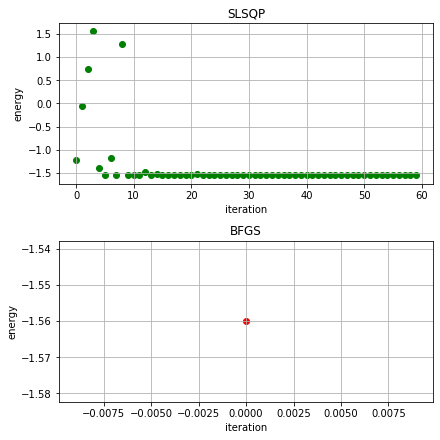

In [119]:
points = []; x0 = np.random.uniform(0, 2 * pi, 6);
result = minimize_spsa(target_func, callback=callback_func, x0=x0, maxiter=options.iterations,a0=0.01, af=0.01, b0=0.1, bf=0.02)
#find new minimizing angles
new_angles = result.x
points = [] #slsqp
result = minimize(target_func, x0=new_angles, callback=callback_func, method="SLSQP", jac=gradient_slsqp,options={'disp': False, 'maxiter': 60, 'eps': 0, 'ftol': 0})
iteration_number = [i for i in range(0, len(points))]
fig, (ax1,ax2) = plt.subplots(nrows = 2, constrained_layout = True, figsize = (6,6))
ax1.scatter(iteration_number, points, color='g');
ax1.grid(True); ax1.set_title('SLSQP');ax1.set_ylabel('energy'); ax1.set_xlabel('iteration');
print("SLSQP_min = " ,target_func(result.x))
#bfgs
points = []
result = minimize(target_func, x0=new_angles, callback=callback_func, method="BFGS", jac=gradient_slsqp,options={'disp': False, 'maxiter': 10000, 'eps': 0, 'gtol':0})
iteration_number = [i for i in range(0, len(points))]
ax2.scatter(iteration_number, points, color='r');
ax2.grid(True); ax2.set_title('BFGS');ax2.set_ylabel('energy'); ax2.set_xlabel('iteration');
print("BFGS_min = " ,target_func(result.x))

## Hadamard_test

SLSQP_min =  -0.8020196282639349


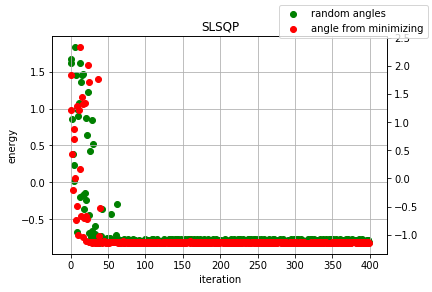

In [91]:
points = []; x0 = np.random.uniform(0, 2 * pi, 6);
result = minimize(target_func, x0=x0, callback=callback_func, method="SLSQP", jac=gradient_hadamard,options={'disp': False, 'maxiter': 400, 'eps': 0, 'ftol': 0})
iteration_number = [i for i in range(0, len(points))]

fig,ax1 = plt.subplots()
ax1.scatter(iteration_number, points, color='g', label = 'random angles');
ax1.grid(True); ax1.set_title('SLSQP');ax1.set_ylabel('energy'); ax1.set_xlabel('iteration');
print("random = " ,target_func(result.x))
ax2 = ax1.twinx()
points = []; 
result = minimize(target_func, x0=new_angles, callback=callback_func, method="SLSQP", jac=gradient_hadamard,options={'disp': False, 'maxiter': 400, 'eps': 0, 'ftol': 0})
iteration_number = [i for i in range(0, len(points))]
ax2.scatter(iteration_number, points, color='r', label = 'angle from minimizing');
fig.legend(loc = 'upper right');
print("ne random = " ,target_func(result.x))

## Histogram

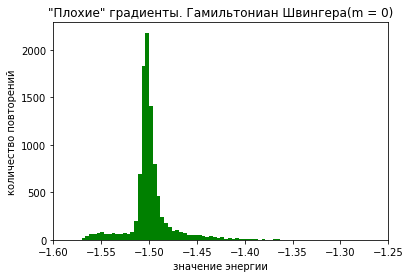

In [112]:
with open('Vqe_data/vqe_bad_grad.txt', 'r') as file:
    nums = [row.strip() for row in file]
nums = list(map(float, nums))
plt.hist(nums,bins=int(len(nums)/40), color = 'green')
# Plot formatting
plt.xlim(-1.6,-1.25)
plt.ylabel('количество повторений')
plt.xlabel('значение энергии')
plt.title('"Плохие" градиенты. Гамильтониан Швингера(m = 0)')
plt.show()

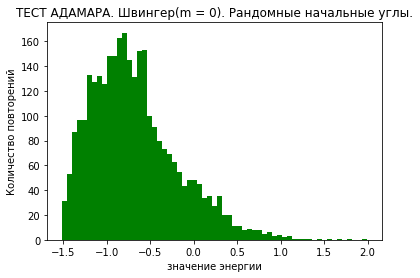

In [114]:
with open('Vqe_data/vqe_SLSQP_1.txt', 'r') as file:
    nums = [row.strip() for row in file]
nums = list(map(float, nums))
plt.hist(nums,bins=int(len(nums)/50), color = 'green')
# Plot formatting
plt.ylabel('Количество повторений')
plt.xlabel('значение энергии')
plt.title('ТЕСТ АДАМАРА. Швингер(m = 0). Рандомные начальные углы.')
plt.show()